In [33]:
# Importing libraries neeeded for the project
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

import numpy 
import warnings

In [34]:
#!/usr/bin/env /Applications/MAMP/Library/bin/python

import mysql.connector

config = {
  'user': 'root',
  'password': 'root',
  'host': '127.0.0.1',
  'port': 8889,
  'database': 'ecotourisme',
  'raise_on_warnings': True
}

cnx = mysql.connector.connect(**config)

cursor = cnx.cursor(dictionary=True)

cursor.execute('SELECT * FROM `ecologie` where id_pays = "US"')
results = cursor.fetchall()
cnx.close()

data1 = pd.DataFrame(results)

data = data1
# afficher  par ordre decroissant annee
data = data.sort_values(by='annee', ascending=True) 
data.head()


,id,id_pays,annee,co2,ges,elecRenew,GES_hab
0,198,US,1990,4844517.4,5855541.470,10.917163,23.7677
1,409,US,1991,4807496.5,5810376.768,10.741865,23.5844
2,620,US,1992,4879626.1,5894661.485,9.729862,23.9265
3,831,US,1993,4995209.5,6006008.717,10.270782,24.3784
4,1042,US,1994,5066803.0,6100512.901,9.532383,24.7620


In [35]:
data = data.set_index('annee')
data = data[['elecRenew']]

In [36]:
from sklearn.metrics import r2_score, mean_squared_error

series = data

X = series.values
size = int(len(X) * 0.8)

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(10,2,1))
 model_fit = model.fit()
 prevision = model_fit.forecast()[0]
 predictions.append(prevision)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (prevision, obs))
 


rmse = sqrt(mean_squared_error(test, predictions))
r2 = r2_score(test, predictions)

print('Test RMSE: %.3f' % rmse)
print(f'R^2: {r2}')


predicted=13.167767, expected=13.350310
predicted=13.737283, expected=13.626135
predicted=14.103310, expected=15.288093
predicted=16.600008, expected=17.451527
predicted=18.800546, expected=17.449990
predicted=18.767776, expected=18.294624
predicted=19.914898, expected=20.315693
Test RMSE: 0.791
R^2: 0.8882619421239593


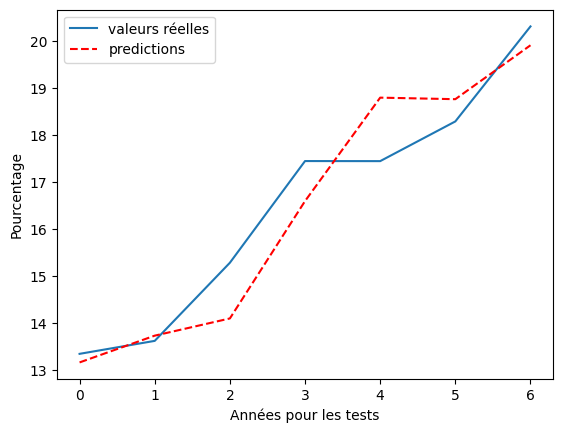

In [37]:
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red', linestyle='dashed')
# titre axe 
pyplot.xlabel('Années pour les tests')
pyplot.ylabel('Pourcentage')
pyplot.legend(['valeurs réelles', 'predictions'])
pyplot.show()